In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
path = "C:/Users/SINDH/Downloads/CaliforniaHousingPrices.csv"
home_data = pd.read_csv(path) #read_csv() assumes data has a header

In [4]:
home_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
home_data = home_data[['longitude', 'latitude', 'median_house_value']]

home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


In [6]:
home_data.shape

(20640, 3)

<Axes: xlabel='longitude', ylabel='latitude'>

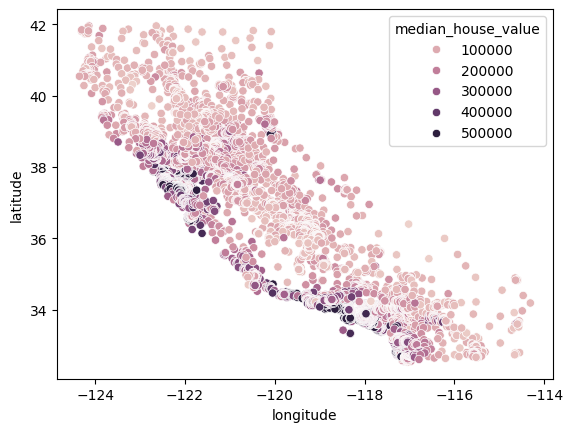

In [7]:
# 'median_house_value' column is used to color-code the data points
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

In [8]:
X = home_data[['latitude', 'longitude']]

X_norm = preprocessing.normalize(X)

In [9]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

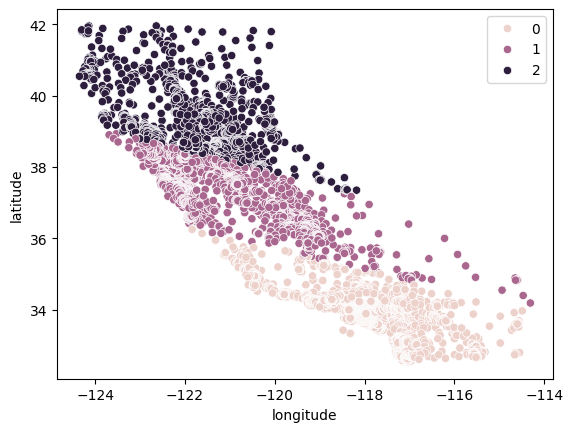

In [10]:
sns.scatterplot(data = X, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

<Axes: ylabel='median_house_value'>

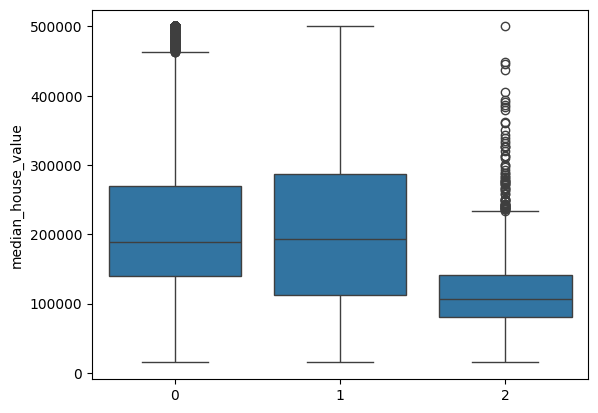

In [11]:
house_values = home_data['median_house_value']
sns.boxplot(x = kmeans.labels_, y = house_values)

In [12]:
silhouette_score(X_norm, kmeans.labels_, metric='euclidean')

0.7499115323584772

In [13]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_norm, model.labels_, metric='euclidean'))

<Axes: xlabel='longitude', ylabel='latitude'>

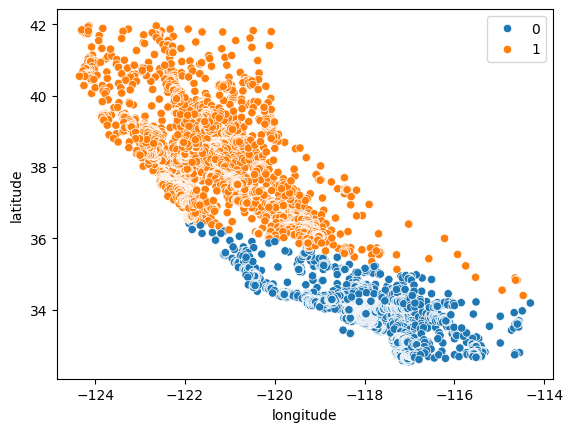

In [14]:
sns.scatterplot(data = X, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

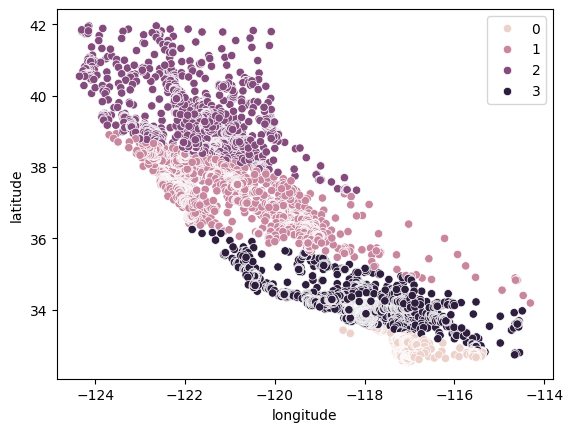

In [15]:
sns.scatterplot(data = X, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

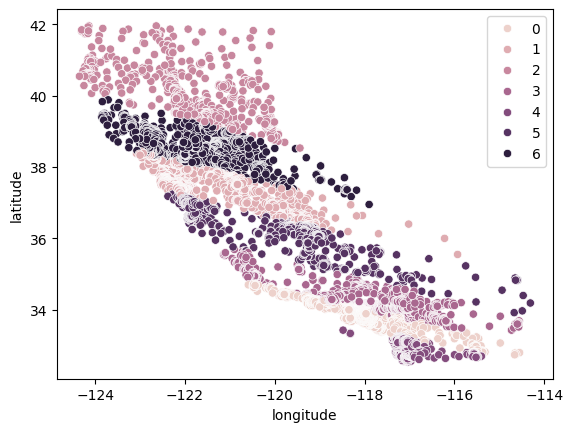

In [16]:
sns.scatterplot(data = X, x = 'longitude', y = 'latitude', hue = fits[5].labels_)

<Axes: >

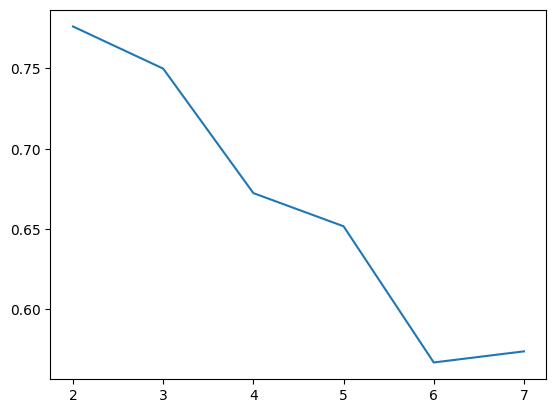

In [17]:
sns.lineplot(x = K, y = score)

<Axes: xlabel='longitude', ylabel='latitude'>

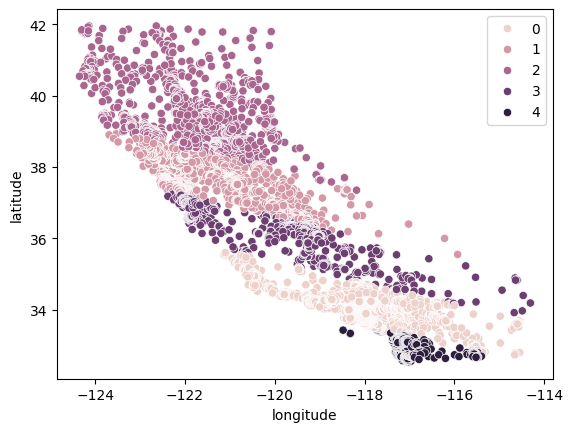

In [18]:
sns.scatterplot(data = X, x = 'longitude', y = 'latitude', hue = fits[3].labels_)

<Axes: ylabel='median_house_value'>

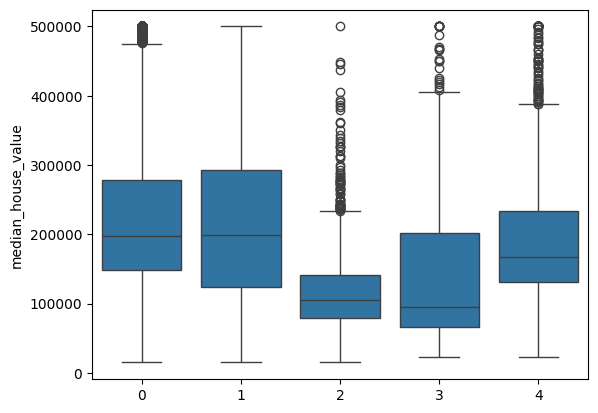

In [19]:
sns.boxplot(x = fits[3].labels_, y = house_values)

In [20]:
path = "C:/Users/SINDH/Downloads/CaliforniaHousingPrices.csv"
home_data = pd.read_csv(path) #read_csv() assumes data has a header

In [21]:
selected_features = home_data[ ["housing_median_age", "total_rooms", "total_bedrooms", "population"]  ]

selected_features.describe()

,housing_median_age,total_rooms,total_bedrooms,population
count,20640.000000,20640.000000,20433.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744
std,12.585558,2181.615252,421.385070,1132.462122
min,1.000000,2.000000,1.000000,3.000000
25%,18.000000,1447.750000,296.000000,787.000000
50%,29.000000,2127.000000,435.000000,1166.000000
75%,37.000000,3148.000000,647.000000,1725.000000
max,52.000000,39320.000000,6445.000000,35682.000000


In [22]:
selected_features.head(10)

,housing_median_age,total_rooms,total_bedrooms,population
0,41.0,880.0,129.0,322.0
1,21.0,7099.0,1106.0,2401.0
2,52.0,1467.0,190.0,496.0
3,52.0,1274.0,235.0,558.0
4,52.0,1627.0,280.0,565.0
5,52.0,919.0,213.0,413.0
6,52.0,2535.0,489.0,1094.0
7,52.0,3104.0,687.0,1157.0
8,42.0,2555.0,665.0,1206.0
9,52.0,3549.0,707.0,1551.0


In [23]:
import numpy as np

In [24]:
selected_features["housing_median_age"].replace("?", np.nan, inplace = True)

C:\Users\SINDH\AppData\Local\Temp\ipykernel_1252\245617363.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_features["housing_median_age"].replace("?", np.nan, inplace = True)
C:\Users\SINDH\AppData\Local\Temp\ipykernel_1252\245617363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["housing_median_age"].replac

In [25]:
selected_features["housing_median_age"].isnull().sum()

0

In [26]:
selected_features["total_rooms"].replace("?", np.nan, inplace = True)

C:\Users\SINDH\AppData\Local\Temp\ipykernel_1252\668685475.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_features["total_rooms"].replace("?", np.nan, inplace = True)
C:\Users\SINDH\AppData\Local\Temp\ipykernel_1252\668685475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["total_rooms"].replace("?", np.nan,

In [27]:
selected_features["total_rooms"].isnull().sum()

0

In [28]:
selected_features["total_bedrooms"].replace("?", np.nan, inplace= True)

C:\Users\SINDH\AppData\Local\Temp\ipykernel_1252\344786479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_features["total_bedrooms"].replace("?", np.nan, inplace= True)
C:\Users\SINDH\AppData\Local\Temp\ipykernel_1252\344786479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["total_bedrooms"].replace("?", np

In [29]:
selected_features["total_bedrooms"].isnull().sum()

207

In [30]:
selected_features["population"].replace("?", np.nan, inplace = True)

C:\Users\SINDH\AppData\Local\Temp\ipykernel_1252\2879441710.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_features["population"].replace("?", np.nan, inplace = True)
C:\Users\SINDH\AppData\Local\Temp\ipykernel_1252\2879441710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["population"].replace("?", np.nan,

In [31]:
selected_features["population"].isnull().sum()

0

In [32]:
selected_features_mean = selected_features["total_bedrooms"].mean()
selected_features["total_bedrooms"].replace(np.nan, selected_features_mean, inplace= True)

C:\Users\SINDH\AppData\Local\Temp\ipykernel_1252\3851724696.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_features["total_bedrooms"].replace(np.nan, selected_features_mean, inplace= True)
C:\Users\SINDH\AppData\Local\Temp\ipykernel_1252\3851724696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["total_bedro

In [33]:
selected_features["total_bedrooms"].isnull().sum()

0

In [34]:
selected_features.groupby("population")["total_bedrooms"].mean()

population
3.0           6.00
5.0           3.00
6.0           2.00
8.0           3.25
9.0           7.00
            ...   
15507.0    5290.00
16122.0    5471.00
16305.0    6210.00
28566.0    6445.00
35682.0    4819.00
Name: total_bedrooms, Length: 3888, dtype: float64

In [35]:
selected_features_norm = preprocessing.normalize(selected_features) 

In [36]:
print(selected_features_norm)

[[0.04330435 0.92945912 0.13625026 0.34009754]
 [0.00277219 0.93713188 0.14600195 0.3169536 ]
 [0.03331069 0.93974594 0.12171215 0.31773278]
 ...
 [0.00675685 0.89587898 0.19276899 0.40024407]
 [0.008808   0.91016017 0.20013737 0.36259607]
 [0.00504461 0.87807691 0.19421737 0.43730437]]


In [37]:
from sklearn.preprocessing import RobustScaler
scaler =  preprocessing.RobustScaler()
selected_features_scaler = scaler.fit_transform(selected_features)

In [38]:
selected_features_scaler

array([[ 0.63157895, -0.73342156, -0.89241877, -0.89978678],
       [-0.42105263,  2.92427584,  1.92924188,  1.31663113],
       [ 1.21052632, -0.38817821, -0.71624549, -0.71428571],
       ...,
       [-0.63157895,  0.0746949 ,  0.13574007, -0.16950959],
       [-0.57894737, -0.15703573, -0.08375451, -0.45309168],
       [-0.68421053,  0.38700191,  0.51407942,  0.23560768]])

In [39]:
selected_features_norm = preprocessing.normalize(selected_features_scaler)

In [40]:
selected_features_norm

array([[ 0.39606755, -0.45993376, -0.55964202, -0.56426255],
       [-0.11179811,  0.77645525,  0.51225331,  0.34959258],
       [ 0.74513076, -0.2389403 , -0.44087975, -0.43967343],
       ...,
       [-0.93980159,  0.11114744,  0.20198383, -0.25223353],
       [-0.76539427, -0.20760825, -0.11072721, -0.59900744],
       [-0.70657304,  0.39965056,  0.53088143,  0.2433082 ]])

In [73]:
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto')
kmeans.fit(selected_features_norm)

KMeans(n_clusters=4, random_state=0)

In [74]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA(n_components = 2)
pca.fit(selected_features_norm)
pca_data = pca.transform(selected_features_norm)
pca_data = pd.DataFrame(pca_data, columns = ['PC1', "PC2"])
pca_data.head()

,PC1,PC2
0,1.009226,-0.073469
1,-0.923991,-0.085173
2,0.846904,-0.475885
3,0.844834,-0.508459
4,0.769151,-0.577098


<Axes: xlabel='PC1', ylabel='PC2'>

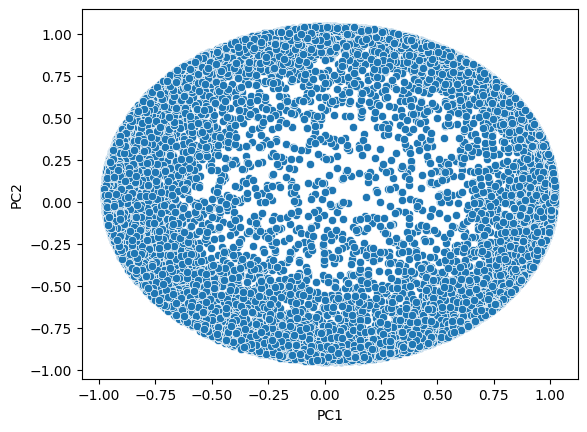

In [76]:
sns.scatterplot(data = pca_data, x = 'PC1', y = 'PC2')

<Axes: xlabel='PC1', ylabel='PC2'>

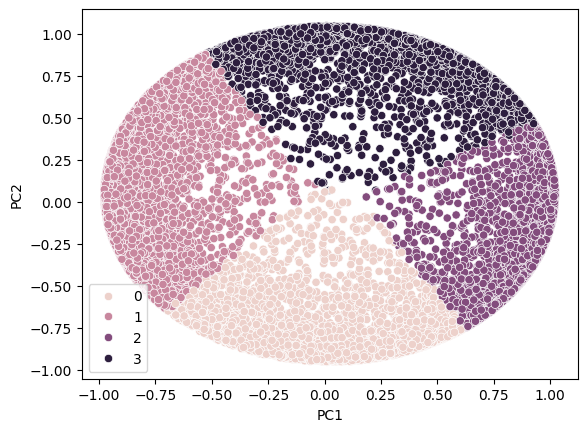

In [77]:
sns.scatterplot(data = pca_data, x = 'PC1', y = 'PC2', hue = kmeans.labels_)

<Axes: ylabel='PC1'>

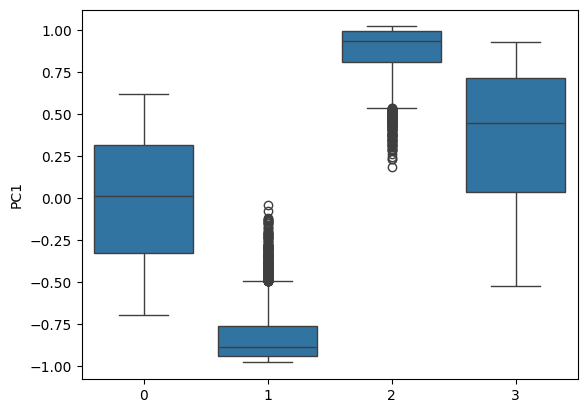

In [78]:
sns.boxplot(x = kmeans.labels_, y = pca_data["PC1"])

In [79]:
silhouette_score(pca_data, kmeans.labels_, metric='euclidean')

0.5273664489203738